In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
class k_means(object):
    def __init__(self, n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, verbose = 0, random_state = None, copy_x = True, algorithm = 'auto'):
        
        self.n_clusters = n_clusters #number of clusters to initialise
        self.init = init #'k-means++' selects initial clusters intelligently. 'random' chooses n_clusters rows at random
        self.n_init = n_init #Number of time the k-means algorithm will be run with different centroid seeds.
        self.max_iter = max_iter #max iterations for a single run
        self.tol = tol #Relative tolerance with regards to Frobenius norm of the difference in the cluster centers
        #of two consecutive iterations to declare convergence.
        self.verbose = verbose #If verbose = 1, print loss over iterations
        self.random_state = random_state #Determines random number generation for centroid initialisation
        self.copy_x = copy_x #Will not modify the original data, if False, data is centered and then uncentered
        self.algorithm = algorithm #EM or elkan
        
        if random_state is not None:
            np.random.RandomState(self.random_state)
        
        #initialised parameters
        #self.cluster_centers_ = None #coordinates of cluster centers.
        #self.labels_ = None #labels of each point
        #self.inertia_ = None #sum of squared distances of samples to their closest center, weighted by sample weights if required
        self.inertia_train_ = None #List of inertia over the optimal run
        self.n_iter_ = None #Number of iterations runs
    
    def label_data(self, X, save_flag = True):
        N = X.shape[0]
        labels = []
        for i in range(N):
            mse = np.sum((self.cluster_centers_ - X[i, :])**2, axis = 1)
            labels.append(np.argmin(mse))
        
        if save_flag:
            self.labels_ = np.array(labels)
            
        else:
            return np.array(labels)
    
    def compute_centroids(self, X):
        new_centers = np.zeros((self.n_clusters, X.shape[1]))
        
        for k in range(self.n_clusters):
            label_indices = np.nonzero(self.labels_ == k)[0]
            
            new_centers[k, :] = np.mean(X[label_indices, :], axis = 0)
        
        tol = np.linalg.norm(self.cluster_centers_ - new_centers)
        
        self.cluster_centers_ = new_centers

        return tol
        
    def calculate_inertia(self, X):
        
        J = 0
        
        for k in range(self.n_clusters):
            label_indices = np.nonzero(self.labels_ == k)[0]
        
            for i in label_indices:
                J += np.sum((self.cluster_centers_[k, :] - X[i, :])**2)
        
        self.inertia_ = J
    
    def initialise_centroids(self, X):
        
        if self.init == 'k-means++':
            print("Initialisation not implemented.")
            raise SystemExit
        
        elif self.init == 'random':
            
            points = np.random.randint(0, X.shape[0], self.n_clusters)
            self.cluster_centers_ = X[points, :]
        
        else:
            print("Illegal initialisation.")
            raise SystemExit
    
    def standardise(self, X):
        self._mu_ = np.mean(X, axis = 0)
        self._std_ = np.std(X, axis = 0)
        
        return (X - self._mu_) / self._std_
    
    def unstandardise(self, X):
        
        return (X * self._std_) + self._mu_
        
    def fit(self, X, sample_weights = None):
        
        #Check to see if you must standardise
        if not self.copy_x:
            X = self.standardise(X)
        
        #initialise centroids
        self.initialise_centroids(X)
        
        #Initialise iteration dictionary
        iter_dict = {}
        
        #Initialise location properties
        optimal_inertia = np.inf
        optimal_outer = None
        
        #Calculate initial inertia
        self.label_data(X)
        self.calculate_inertia(X)
        
        for outer_iter in range(self.n_init):
            
            local_inertia_list = []
            
            tol = np.inf
            cnt = 0
            while cnt < self.max_iter and tol > self.tol:
                
                #E step
                self.label_data(X)
                #print(self.labels_)
                
                #M step
                tol = self.compute_centroids(X)
                
                #Calculate loss
                self.calculate_inertia(X)
                
                #Finalise iteration
                local_inertia_list.append(self.inertia_)
                cnt += 1
            
            iter_dict[str(outer_iter)] = {"centers":self.cluster_centers_,
                                          "labels":self.labels_,
                                          "loss_list":local_inertia_list,
                                          "n_iters":cnt}
            
            if optimal_inertia > self.inertia_:
                optimal_inertia = self.inertia_
                optimal_outer = outer_iter
        
        #Load in optimal clusters
        self.cluster_centers_ = iter_dict[str(optimal_outer)]["centers"]
        
        #Label data
        self.labels_ = iter_dict[str(optimal_outer)]["labels"] #Will create a disjoint if it terminates early
        
        #Store loss list
        self.inertia_train_ = iter_dict[str(optimal_outer)]["loss_list"]
        
        #Check to see if you must un-standardise
        if not self.copy_x:
            X = self.unstandardise(X)
            self.cluster_centers = self.unstandardise(self.cluster_centers)
    
    def predict(self, X, sample_weight = None):
        labels = self.label_data(X, save_flag = False)
        
        return labels
    
    def fit_predict(self, X, sample_weight = None):
        self.fit(X, sample_weight)
        labels = self.label_data(X, save_flag = False)
        
        return labels
    
    def fit_transform(self, X, sample_weight = None):
        self.fit(X, sample_weights)
        X_new = self.transform(X)
        
        return X_new
    
    def score(self, X, sample_weight = None):
        pass

    def transform(self, X): #transform X to a cluster-distance space
        
        return X_new
    

In [2]:
class sample_random_balls(object):
    
    def __init__(self, n_centers, var_x = 1, var_y = 1, var_xy = 0, x_range = [-10, 10], y_range = [-10, 10], rotate = False):
        """
        Want to sample K blobs, with n_points per blob. Diversity range is controlled by x_range and y_range
        """
        
        self.n_centers = n_centers
        self.covariance = np.array([[var_x, var_xy], 
                                    [var_xy, var_y]])
        
        self.x_centers = np.random.random_sample(n_centers) * (x_range[1] - x_range[0]) + x_range[0]
        self.y_centers = np.random.random_sample(n_centers) * (y_range[1] - y_range[0]) + y_range[0]
        
        self.mu = np.vstack([self.x_centers, self.y_centers]).T
    
    def sample(self, n_points):
        #Find any real matrix A such that A.A^T = Cov. If Cov is positive definite, Cholesky decomposition can be used.
        #Alternatively, use spectral decomposition Cov = U.S.U^(-1) (A = U.sqrt(S)) (U is the eigenvector matrix)
        #Let z = (z_1, ..., z_n)^T be a vector whose components are N independent standard normal variables
        #let x = mu + Az.
        
        #Positive definite - x^T A x > 0 for all x (all eigenvalues are positive)
        #Positive semi-definite - x^T A x >= 0 for all x (all eigenvalues are non-negative)
        
        eig_vals, eig_vect = np.linalg.eig(self.covariance)
        
        if np.sum(eig_vals > 0) == 2:
            print("\nCovariance is positive definite.")
            
            A = np.linalg.cholesky(self.covariance)
            
        elif np.sum(eig_vals >= 0) == 2:
            print("\nCovariance is positive semi-definite.")
            
            A = np.dot(eig_vect, np.diag(np.sqrt(eig_vals)))
        
        
        point_samples = np.random.randint(low = 0, high = self.n_centers, size = n_points)
        
        z = np.random.randn(n_points, 2)
        x = self.mu[point_samples, :] + np.dot(A, z.T).T
        
        return x, point_samples

In [359]:
class gaussian_mixture_models(object):
    def __init__(self, n_components, covariance_type = 'full', tol = 0.001, reg_covar = 1e-6, max_iter = 100, n_init = 1, init_params = 'kmeans', random_state = None, warm_start = False, verbose = False, verbose_interval = 10):
        
        self.n_components = n_components
        self.covariance_type = covariance_type #full, tied, diag, spherical
        self.tol = tol #convergence threshold, stops when lower bound avg gain is below threshold
        self.reg_covar = reg_covar #Non-negative regularisation added to the diagonal of covariance. Ensures cov is positive
        self.max_iter = max_iter #Number of EM iterations
        self.n_init = n_init #Number of initialisations to perform
        self.init_params = init_params #'k-means' or 'random' - specifies how to initialise means and covariances
        self.random_state = random_state #controls the random seed to initialise the parameters of the model
        self.warm_start = warm_start #if True, solution of last fitting is used to initialise the next run
        self.verbose = verbose #Controls what you print
        self.verbose_interval = verbose_interval #Intervals between prints
        
        #Attributes
        #self.weights_ = None #Mixture weights #(n_components,)
        #self.means_ = None #Mixture means (n_components, n_features)
        #self.covariances = None #Mixture covariances
        # spherical: (n_components, )
        # diagonal: (n_components, n_features)
        # tied: (n_features, n_features)
        # full: (n_components, n_features, n_features)
        #self.converged_ = False #Flag to tell if the model converged
        #self.n_iter_ = None #Number of steps to finalise run
        #self.lower_bound_ = None #lower bound value of the log-likelihood (training data wrt model for best fit model)
        #self.n_features_in_ = None #number of features seen during fit
    
    def set_params(self, X):
        
        Ntotal, self.n_features_in_ = X.shape
        
        #Initialise weight (mixing coeffient) vector
        mix_init = np.zeros((self.n_components,))
        
        #Initialise mean matrix
        mu_init = np.zeros((self.n_components, self.n_features_in_))

        #Initialise covariance matrix
        if self.covariance_type == 'spherical':
            cov_init = np.zeros((self.n_components,))
        
        elif self.covariance_type == 'diagonal':
            cov_init = np.zeros((self.n_components, self.n_features_in_))
        
        elif self.covariance_type == 'tied':
            cov_init = np.zeros((self.n_features_in_, self.n_features_in_))
        
        elif self.covariance_type == 'full':
            cov_init = np.zeros((self.n_components, self.n_features_in_, self.n_features_in_))
        
        else:
            print("Incompatible covariance_type entered.")
            raise SystemExit
        
        if self.init_params == 'kmeans':
            self.k_means_local = k_means(self.n_components, 'random', random_state = self.random_state)
            print("\nRunning k-means to initialise model parameters...")
            label = self.k_means_local.fit_predict(X)
            print("\nFinished k-means")
            
            for i in range(self.n_components):
                label_indices = np.nonzero(label == i)[0]
                
                x_cluster = X[label_indices, :]
                N = len(label_indices)
                
                #Update mixing matrix
                mix_init[i] = len(label_indices) / Ntotal
                
                #Save mean
                mu_init[i, :] = np.mean(x_cluster, axis = 0)
                
                #Calculate standard covariance
                z = x_cluster - mu_init[i, :]
                covariance_cluster = 1/(N - 1) * np.dot(z.T, z)
                
                #Add in regularisation term
                covariance_cluster += np.eye(self.n_features_in_) * self.reg_covar
                
                if self.covariance_type == 'spherical':
                    cov_init[i] = np.mean(np.diag(covariance_cluster))

                elif self.covariance_type == 'diagonal':
                    cov_init[i, :] = np.diag(covariance_cluster)

                elif self.covariance_type == 'tied':
                    cov_init += covariance_cluster

                elif self.covariance_type == 'full':
                    cov_init[i, :, :] = covariance_cluster
            
            if self.covariance_type == 'tied':
                cov_init /= self.n_components
        
        elif self.init_params == 'random':
            print("'random' init_params initialisation not implemented.")
            raise SystemExit
        
        else:
            print("Incompatible init_params entered.")
            raise SystemExit
        
        #Save matrices
        self.weights_ = mix_init
        self.means_ = mu_init
        self.covariances_ = cov_init
    
    def get_params(self):
        
        return self.weights_, self.means_, self.covariances_
    
    def evaluate_gauss(self, x_vec, mu, covariance):
        #All vector/matrix inputs (so that shape is fine)
        #You could also store the precisions, may make this evaluation faster
        D = x_vec.shape[0]
        z = x_vec - mu
        
        first_part = 1 / ((2 * np.pi)**(D / 2))  * 1 / (np.linalg.det(covariance)**(1/2))
        second_part = np.exp((-1 / 2) * np.dot(z.T, np.linalg.solve(covariance, z)))
        
        return first_part * second_part
    
    def evaluate_log_gauss(self, x_vec, mu, covariance):
        #All vector/matrix inputs (so that shape is fine)
        #You could also store the precisions, may make this evaluation faster
        D = x_vec.shape[0]
        z = x_vec - mu
        
        first_part = -D/2 * np.log(2 * np.pi)
        second_part = -1/2 * np.log(np.linalg.det(covariance))
        third_part = -1/2 * np.dot(z.T, np.linalg.solve(covariance, z))
        
        return first_part + second_part + third_part
    
    def data_likelihood(self, x_vec): #p(x)
        
        #use log-sum-exp to ensure that you do not hit numerical underflow!
        mix, mu, cov = self.get_params()
        
        log_likelihoods = np.zeros((self.n_components,))
        
        for k in range(self.n_components):
            
            mean_vec = mu[[k], :].T #N x 1 vector

            if self.covariance_type == 'spherical':
                cov_mat = np.diag(cov[k] * np.ones(self.n_features_in_))

            elif self.covariance_type == 'diagonal':
                cov_mat = np.diag(cov[k, :])

            elif self.covariance_type == 'tied':
                cov_mat = cov

            elif self.covariance_type == 'full':
                cov_mat = cov[k, :, :]

            log_likelihoods[k] = self.evaluate_log_gauss(x_vec, mean_vec, cov_mat) + np.log(mix[k])

        #Apply log-sum-exp trick
        A = np.max(log_likelihoods)

        log_likelihood_sum = A + np.log(np.sum(np.exp(log_likelihoods - A)))
        
        p_x = np.exp(log_likelihood_sum)
        
        return p_x, log_likelihoods, log_likelihood_sum
    
    def posterior_likelihood(self, x_vec): #Calculates the responsibilities 
        
        _, log_likelihoods, log_likelihood_sum = self.data_likelihood(x_vec)
        
        responsibility = np.exp(log_likelihoods - log_likelihood_sum)
        
        return responsibility
        
    
    def log_likelihood(self, X): #We apply the log-sum-exp trick again here, to avoid numerical underflow
        
        N = X.shape[0]
        avg_LL = 0
        
        mix, mu, cov = self.get_params()
        
        for i in range(N):

            x_vec = X[[i], :].T #N x 1 vector
            
            #Add log-likelihood
            avg_LL += self.data_likelihood(x_vec)[2]
        
        return avg_LL
    
    def Nk(self, X):
        N = X.shape[0]
        
        resp_mat = np.zeros((N, self.n_components))
        
        for i in range(N):
            resp_mat[i, :] = self.posterior_likelihood(X[[i], :].T)
        
        N_vec = np.sum(resp_mat, axis = 0)
        
        return N_vec, resp_mat
    
    def update_mu(self, X, resp_mat, N_vec):
        
        mu_new = np.zeros_like(self.means_)
        
        for i in range(self.n_components):
            mu_new[i, :] = np.sum(resp_mat[:, [i]] * X, axis = 0) / N_vec[i]
        
        self.means_ = mu_new
    
    def update_covar(self, X, resp_mat, N_vec):
        
        N, D = X.shape
        cov_mat = np.zeros_like(self.covariances_)
        
        if self.covariance_type == 'spherical':
            
            for k in range(self.n_components):
                
                placeholder_cov = np.zeros((1, 1))
                
                for n in range(N):
                    z = np.transpose(X[[n], :] - self.means_[[k], :])
                    
                    placeholder_cov += resp_mat[n, k] * np.dot(z.T, z)
                
                #Normalise by D * Nk
                placeholder_cov /= (D * N_vec[k])

                cov_mat[k] = placeholder_cov[0, 0] + self.reg_covar #Add in regularisation term

        elif self.covariance_type == 'diagonal':
            for k in range(self.n_components):
                
                placeholder_cov = np.zeros((self.n_features_in_, 1))
                
                for n in range(N):
                    z = np.transpose(X[[n], :] - self.means_[[k], :])
                    
                    placeholder_cov += resp_mat[n, k] * (z**2)
                
                #Normalise by Nk
                placeholder_cov /= N_vec[k]

                cov_mat[k, :] = placeholder_cov[:, 0] + self.reg_covar #Add in regularisation term

        elif self.covariance_type == 'tied':
            
            placeholder_cov = np.zeros_like(cov_mat)
            
            for k in range(self.n_components):
                
                for n in range(N):
                    z = np.transpose(X[[n], :] - self.means_[[k], :])
                    
                    placeholder_cov += resp_mat[n, k] * (z**2)
                
            #Normalise by K * N
            placeholder_cov /= (self.n_components * N)

            cov_mat[:, :] = placeholder_cov + np.eye(self.n_features_in_) * self.reg_covar #Add in regularisation term

        elif self.covariance_type == 'full':
            
            for k in range(self.n_components):
                
                placeholder_cov = np.zeros_like(cov_mat[k, :, :])
                
                for n in range(N):
                    z = np.transpose(X[[n], :] - self.means_[[k], :])
                    
                    placeholder_cov += resp_mat[n, k] * np.dot(z, z.T)
                
                #Normalise by Nk
                placeholder_cov /= N_vec[k]
                
                cov_mat[k, :, :] = placeholder_cov + np.eye(self.n_features_in_) * self.reg_covar #Add in regularisation term
                
        self.covariances_ = cov_mat
    
    def update_mixture(self, X, N_vec):
        N = X.shape[0]
        
        mix_new = N_vec / N
        
        self.weights_ = mix_new
    
    def fit(self, X):
        
        tol = np.inf
        cnt = 0
        loss_train = [self.log_likelihood(X)]
        
        print("\nBeginning GMM training...")
        
        while cnt < self.max_iter and tol > self.tol:
            #Determine responsibilities for each class
            N_vec, resp_mat = self.Nk(X)

            #Update means
            self.update_mu(X, resp_mat, N_vec)

            #Update covariance
            self.update_covar(X, resp_mat, N_vec)

            #Update mixture coefficients
            self.update_mixture(X, N_vec)

            #Calculate log-likelihood
            loss = self.log_likelihood(X)
            
            tol = np.abs(loss_train[-1] - loss)
            
            print("Loss at epoch {}: {}, {}".format(cnt, loss, tol))

            #Update other variables
            cnt += 1
            loss_train.append(loss)
        
        print("\Finished GMM training!")
        #Store attributes
        self.n_iter_ = cnt
        
        if cnt <= self.max_iter or tol <= self.tol:
            self.converged = True
        
        else:
            self.converged = False
        
        self.lower_bound_ = loss_train[-1]
        self.loss_train = loss_train
        
        return self
    
    def predict(self, X):
        
        _, resp_mat = self.Nk(X)
        
        labels = np.argmax(resp_mat, axis = 1)
        
        return labels
    
    def fit_predict(self, X):
        
        return labels
    
    def estimate_centroids(self):
        pass
    
    def sample(self, n_samples = 1):
        
        return X, labels
    
    def predict_proba(self, X):
        
        return responsibilities
    
    def score(self, X):
        return avg_LL
    
    def score_samples(self, X):
        return sample_LL
    
    def aic(self, X):
        pass
    
    def bic(self, X):
        pass
    
    
    
    

## Setup dataset

[[1.  0.8]
 [0.8 1. ]]


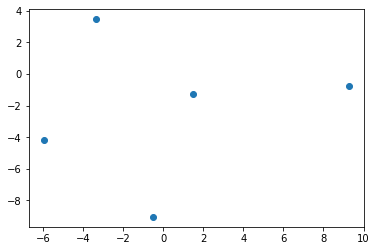


Covariance is positive definite.
(5000, 2)


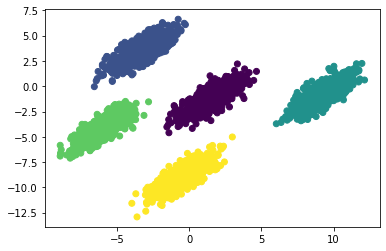

In [343]:
sample_blobs = sample_random_balls(5, var_x = 1, var_y = 1, var_xy = 0.8)
print(sample_blobs.covariance)
plt.figure()
plt.scatter(sample_blobs.mu[:, 0], sample_blobs.mu[:, 1])
plt.show()

x, l = sample_blobs.sample(5000)

print(x.shape)

plt.figure()
plt.scatter(x[:, 0], x[:, 1], c = l)
plt.show()

## k-means run

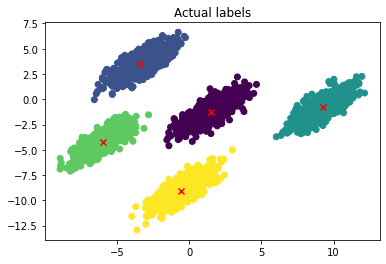

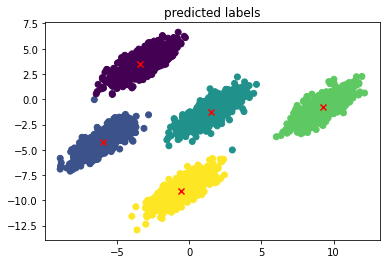

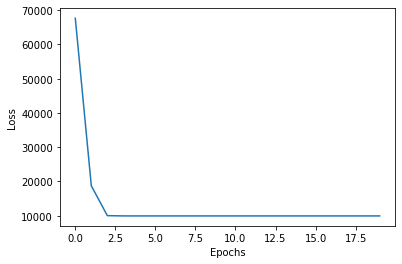

In [357]:
k_means_local = k_means(5, 'random', max_iter = 20)
k_means_local.fit(x)
labels_kmeans = k_means_local.predict(x)

plt.figure()
plt.title("Actual labels")
plt.scatter(x[:, 0], x[:, 1], c = l)
plt.scatter(k_means_local.cluster_centers_[:, 0], k_means_local.cluster_centers_[:, 1], c = "r", marker = "x")
plt.show()

plt.figure()
plt.title("predicted labels")
plt.scatter(x[:, 0], x[:, 1], c = labels_kmeans)
plt.scatter(k_means_local.cluster_centers_[:, 0], k_means_local.cluster_centers_[:, 1], c = "r", marker = "x")
plt.show()

plt.figure()
plt.plot(k_means_local.inertia_train_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## GMM run


Running k-means to initialise model parameters...

Finished k-means


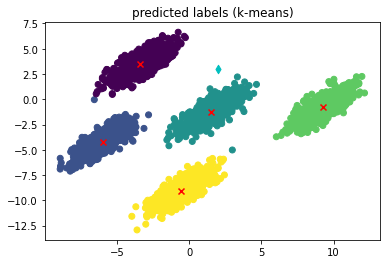

[6.95018265e-11 9.99998154e-01 3.38984887e-54 6.87087852e-51
 1.84562656e-06] 0.9999999999999994
[ 1.49159145 -1.30711741]


In [374]:
test_gmm_run = gaussian_mixture_models(5, covariance_type = 'tied', random_state = 0)
test_gmm_run.set_params(x)

query = np.array([[2, 3]])

resp = test_gmm_run.posterior_likelihood(query.T)

plt.figure()
plt.title("predicted labels (k-means)")
plt.scatter(x[:, 0], x[:, 1], c = labels_kmeans)
plt.scatter(test_gmm_run.means_[:, 0], test_gmm_run.means_[:, 1], c = "r", marker = "x")
plt.scatter(query[0, 0], query[0, 1], c = "c", marker = "d")
plt.show()

print(resp, np.sum(resp))
print(test_gmm_run.means_[np.argmax(resp), :])

<ipython-input-359-8ea863a56c92>:166: RuntimeWarning: overflow encountered in exp
  p_x = np.exp(log_likelihood_sum)



Beginning GMM training...
Loss at epoch 0: -171311978.40906334, 0.0
\Finished GMM training!


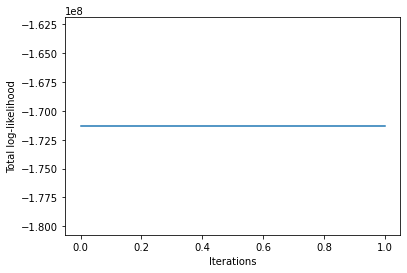

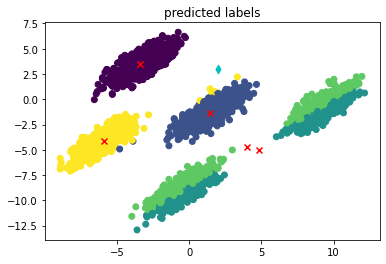

[0. 0. 0. 0. 1.] 1.0
[-5.90981677 -4.15550279]


In [378]:
optimal_model = test_gmm_run.fit(x)
labels_GMM = optimal_model.predict(x)
plt.figure()
plt.plot(optimal_model.loss_train)
plt.ylabel("Total log-likelihood")
plt.xlabel("Iterations")
plt.show()

query = np.array([[2, 3]])

resp = optimal_model.posterior_likelihood(query.T)

plt.figure()
plt.title("predicted labels")
plt.scatter(x[:, 0], x[:, 1], c = labels_GMM)
plt.scatter(optimal_model.means_[:, 0], optimal_model.means_[:, 1], c = "r", marker = "x")
plt.scatter(query[0, 0], query[0, 1], c = "c", marker = "d")
plt.show()

print(resp, np.sum(resp))
print(test_gmm_run.means_[np.argmax(resp), :])

(10000, 2)


<ipython-input-359-8ea863a56c92>:166: RuntimeWarning: overflow encountered in exp
  p_x = np.exp(log_likelihood_sum)


(10000,)


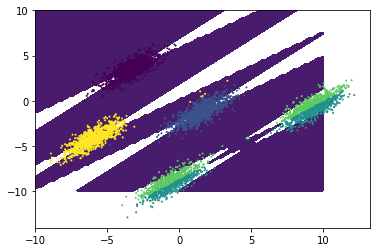

In [376]:
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

XY = np.hstack((X.reshape(-1, 1), Y.reshape(-1, 1)))
Z = []

print(XY.shape)

for i in range(XY.shape[0]):
    x_vec = XY[[i], :].T
    p_x, _, _ = optimal_model.data_likelihood(x_vec)
    
    Z.append(p_x)

Z = np.array(Z)
print(Z.shape)

plt.figure()
plt.contourf(X, Y, Z.reshape(100, 100))
plt.scatter(x[:, 0], x[:, 1], c = labels_GMM, s = 1)
plt.show()

## Compare to Scikit learn version

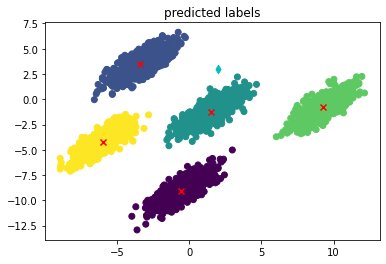

In [377]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, random_state=0, covariance_type = 'tied').fit(x)

gm_labels = gm.predict(x)

plt.figure()
plt.title("predicted labels")
plt.scatter(x[:, 0], x[:, 1], c = gm_labels)
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c = "r", marker = "x")
plt.scatter(query[0, 0], query[0, 1], c = "c", marker = "d")
plt.show()